In [66]:
# Start of the notebook

# Step 1: Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb

In [67]:
# Step 2: Load the dataset
train_data = pd.read_excel('/content/train_data.xlsx')
test_data = pd.read_excel('/content/test_data.xlsx')


   customer_id transaction_date  cibil_score  total_no_of_acc  annual_inc  \
0    -0.498208       2016-04-01     0.151556         8.640362    0.920151   
1    -0.157719       2016-04-01     0.560558         8.640362   -0.216146   
2    -0.823793       2016-04-01    -1.075452         7.125970    0.378348   
3    -1.251359       2016-04-01    -0.666449         7.125970    1.500654   
4    -0.597243       2016-04-01    -1.075452         7.125970   -0.086055   

   int_rate  loan_amnt  installment  account_bal  emp_length  ...  \
0 -0.879255   0.470511     0.636216    -0.273288    1.222506  ...   
1  0.701097  -0.642045    -0.453255    -0.595045   -1.365153  ...   
2  0.701097  -0.299315    -0.502035    -0.353298   -0.659428  ...   
3 -0.681711   0.997788     1.230840    -0.328460   -0.659428  ...   
4  0.451042   0.048689    -0.242052    -0.299709    1.222506  ...   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                   False            False   

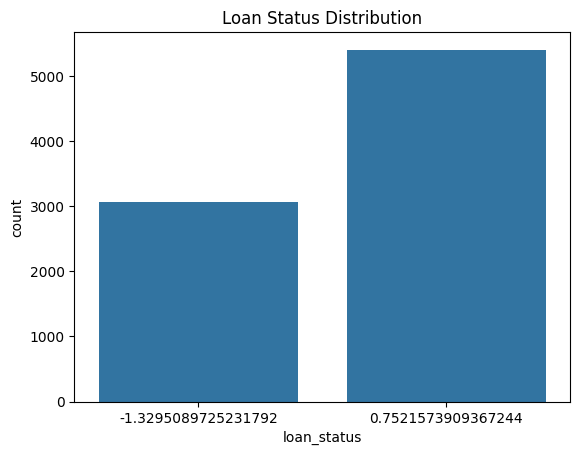

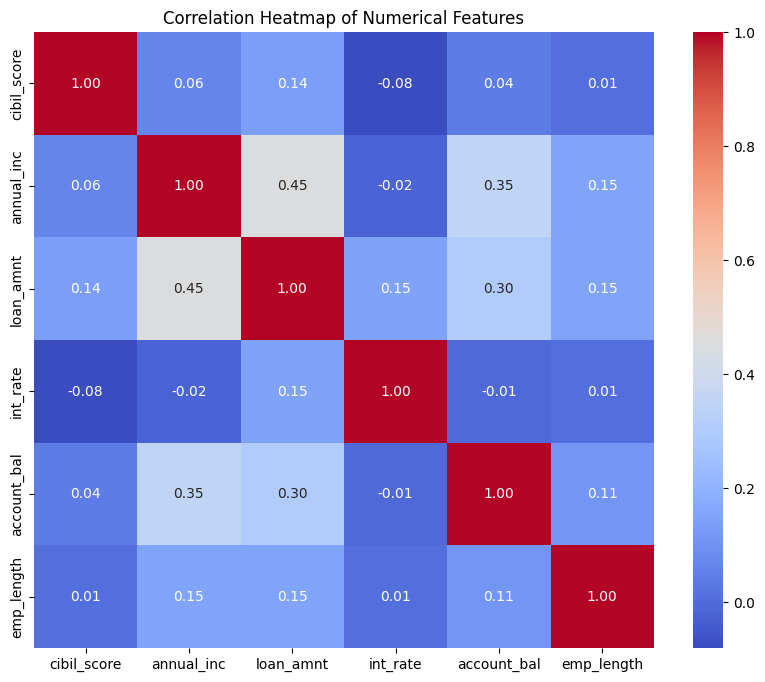

In [68]:
# Step 3: Exploratory Data Analysis (EDA)

# Check the first few rows of the training data
print(train_data_encoded.head())

# Check for missing values
print(train_data_encoded.isnull().sum())

# Check for duplicate rows
print(train_data_encoded.duplicated().sum())

# Check class distribution (target variable)
print("Class distribution:")
print(train_data_encoded['loan_status'].value_counts())

# Visualize the distribution of the target variable
sns.countplot(x='loan_status', data=train_data_encoded)
plt.title("Loan Status Distribution")
plt.show()

# Plot the correlation heatmap of numerical features
numerical_features = ['cibil_score', 'annual_inc', 'loan_amnt', 'int_rate', 'account_bal', 'emp_length']
corr = train_data_encoded[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [70]:
# Step 4: Data Preprocessing

# Convert target variable to binary if not already
y_train = train_data_encoded['loan_status'].astype(int)
y_test = test_data_encoded['loan_status'].astype(int)

# Split the data into features and target variable
X_train = train_data_encoded.drop('loan_status', axis=1)
X_test = test_data_encoded.drop('loan_status', axis=1)

# Identify columns with DateTime64 dtype
datetime_cols = X_train.select_dtypes(include=['datetime64']).columns

# Convert DateTime columns to numerical representation (e.g., ordinal)
for col in datetime_cols:
    X_train[col] = X_train[col].astype(int)  # Convert to ordinal
    X_test[col] = X_test[col].astype(int)    # Apply the same transformation to X_test

# Apply SMOTE to balance the training data (only for training data)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [71]:
# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

In [73]:
# Step 4: Apply SMOTE to balance the dataset (only for training data)
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the training set and ensure that the target values are binary (0 and 1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Ensure the class labels are 0 and 1 (replace -1 with 1 if needed)
y_train_balanced = np.where(y_train_balanced == -1, 1, y_train_balanced)

# Check the unique values in the balanced target
print("Unique values in the balanced target:", np.unique(y_train_balanced))

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the models (Logistic Regression, Random Forest, XGBoost)
# Train Logistic Regression
logreg.fit(X_train_scaled, y_train_balanced)

# Train Random Forest
rf.fit(X_train_scaled, y_train_balanced)

# Train XGBoost
xgb_model.fit(X_train_scaled, y_train_balanced)

# Now, you can continue with the evaluation and predictions...


Unique values in the balanced target: [0 1]


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [74]:
# Step 7: Model Evaluation

# Evaluate Logistic Regression
y_pred_logreg = logreg.predict(X_test_scaled)
logreg_acc = accuracy_score(y_test, y_pred_logreg)
logreg_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
logreg_report = classification_report(y_test, y_pred_logreg)

# Evaluate Random Forest
y_pred_rf = rf.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1])
rf_report = classification_report(y_test, y_pred_rf)

# Evaluate XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])
xgb_report = classification_report(y_test, y_pred_xgb)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [75]:
# Step 8: Display the results
print("Logistic Regression Evaluation:")
print(f"Accuracy: {logreg_acc}")
print(f"AUC-ROC: {logreg_auc}")
print(logreg_report)

print("\nRandom Forest Evaluation:")
print(f"Accuracy: {rf_acc}")
print(f"AUC-ROC: {rf_auc}")
print(rf_report)

print("\nXGBoost Evaluation:")
print(f"Accuracy: {xgb_acc}")
print(f"AUC-ROC: {xgb_auc}")
print(xgb_report)


Logistic Regression Evaluation:
Accuracy: 0.35599138120575174
AUC-ROC: 0.3212417559879094
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00     29689
           0       0.85      0.48      0.61     84016
           1       0.00      0.00      0.00         0

    accuracy                           0.36    113705
   macro avg       0.28      0.16      0.20    113705
weighted avg       0.63      0.36      0.45    113705


Random Forest Evaluation:
Accuracy: 0.5996921859197045
AUC-ROC: 0.30420561007615426
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00     29689
           0       0.81      0.81      0.81     84016
           1       0.00      0.00      0.00         0

    accuracy                           0.60    113705
   macro avg       0.27      0.27      0.27    113705
weighted avg       0.60      0.60      0.60    113705


XGBoost Evaluation:
Accuracy: 0.5901763334945693
AUC-ROC: 0.32

In [78]:
# Step 9: Model Selection (choosing the best model)
# Assuming XGBoost performed the best, we can save it for future use.
best_model = xgb_model  # You can choose based on the evaluation results

In [81]:
# Ensure the columns in new_data match the columns in the training data
# List the columns of the training data
train_columns = X_train.columns

# If new_data has missing columns, add them with default values (0)
for col in train_columns:
    if col not in new_data.columns:
        new_data[col] = 0  # Add the missing column with a default value (0)

# Ensure that new_data has the same columns as the training data
new_data = new_data[train_columns]

# Step 2: Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Step 3: Make predictions with the trained model (e.g., XGBoost)
predictions = best_model.predict(new_data_scaled)

# Step 4: Print predictions
print("Predictions for new data:", predictions)


Predictions for new data: [1 1]
